Se entrega data de pruebas donde la variable objetivo es precio de venta de una propiedad (SalePrice).

- [x] Leer los datos completos y guardarlos en un dataset (data)
- [x] Leer los datos sin la variable objetivo y guardarlos en un dataset (data_sin_y)
- [] Realizar la correlacion de los dos dataset
- [] Mostrar la matriz de correlacion de los dos dataset
- [] Identificar al menos 1 correlacion mayor al 90% en el dataset completo
- [] Llenar en el dataset que no tiene la variable objetivo en los datos null lo siguiente
    - [] Campos numerico la mediana (median)
    - [] Campos categoricos la mas frecuente (most_frequent)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 

In [39]:
# 1. Leer los datos completos y guardarlos en un dataset (data)
data = pd.read_csv("../data/no_processed/train_cat.csv")
# pd.set_option('display.max_columns', None)
# data.head()
data.info()
# data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2302 non-null   int64  
 1   MSSubClass     2302 non-null   int64  
 2   MSZoning       2298 non-null   object 
 3   LotFrontage    1915 non-null   float64
 4   LotArea        2302 non-null   int64  
 5   Street         2302 non-null   object 
 6   Alley          148 non-null    object 
 7   LotShape       2302 non-null   object 
 8   LandContour    2302 non-null   object 
 9   Utilities      2301 non-null   object 
 10  LotConfig      2302 non-null   object 
 11  LandSlope      2302 non-null   object 
 12  Neighborhood   2302 non-null   object 
 13  Condition1     2302 non-null   object 
 14  Condition2     2302 non-null   object 
 15  BldgType       2302 non-null   object 
 16  HouseStyle     2302 non-null   object 
 17  OverallQual    2302 non-null   int64  
 18  OverallC

In [38]:
# 2. Leer los datos sin la variable objetivo y guardarlos en un dataset (data_sin_y)
data_sin_y = data.drop("SalePrice", axis=1)

In [34]:
data_without_object = data.select_dtypes(include=['number'])
data_without_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2302 non-null   int64  
 1   MSSubClass     2302 non-null   int64  
 2   LotFrontage    1915 non-null   float64
 3   LotArea        2302 non-null   int64  
 4   OverallQual    2302 non-null   int64  
 5   OverallCond    2302 non-null   int64  
 6   YearBuilt      2302 non-null   int64  
 7   YearRemodAdd   2302 non-null   int64  
 8   MasVnrArea     2282 non-null   float64
 9   BsmtFinSF1     2302 non-null   int64  
 10  BsmtFinSF2     2302 non-null   int64  
 11  BsmtUnfSF      2302 non-null   int64  
 12  TotalBsmtSF    2302 non-null   int64  
 13  1stFlrSF       2302 non-null   int64  
 14  2ndFlrSF       2302 non-null   int64  
 15  LowQualFinSF   2302 non-null   int64  
 16  GrLivArea      2302 non-null   int64  
 17  BsmtFullBath   2301 non-null   float64
 18  BsmtHalf

In [35]:
data_sin_y_without_object = data_sin_y.select_dtypes(include=['number'])
data_sin_y_without_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2302 non-null   int64  
 1   MSSubClass     2302 non-null   int64  
 2   LotFrontage    1915 non-null   float64
 3   LotArea        2302 non-null   int64  
 4   OverallQual    2302 non-null   int64  
 5   OverallCond    2302 non-null   int64  
 6   YearBuilt      2302 non-null   int64  
 7   YearRemodAdd   2302 non-null   int64  
 8   MasVnrArea     2282 non-null   float64
 9   BsmtFinSF1     2302 non-null   int64  
 10  BsmtFinSF2     2302 non-null   int64  
 11  BsmtUnfSF      2302 non-null   int64  
 12  TotalBsmtSF    2302 non-null   int64  
 13  1stFlrSF       2302 non-null   int64  
 14  2ndFlrSF       2302 non-null   int64  
 15  LowQualFinSF   2302 non-null   int64  
 16  GrLivArea      2302 non-null   int64  
 17  BsmtFullBath   2301 non-null   float64
 18  BsmtHalf

/var/folders/cm/3twsr_7954j7r3xfp1_yd7qc0000gn/T/ipykernel_74017/3500915932.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 1))


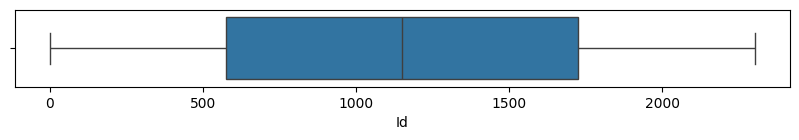

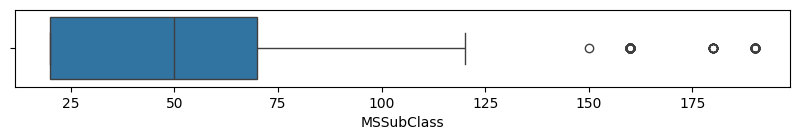

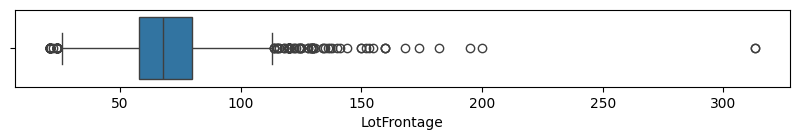

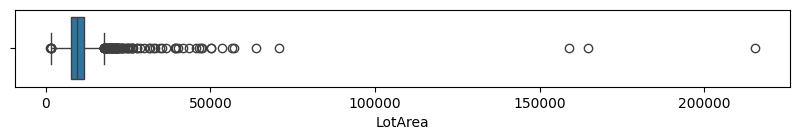

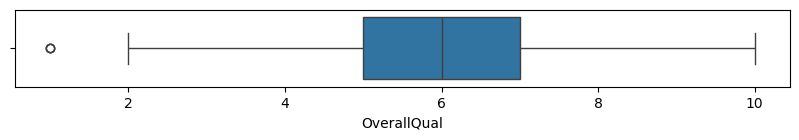

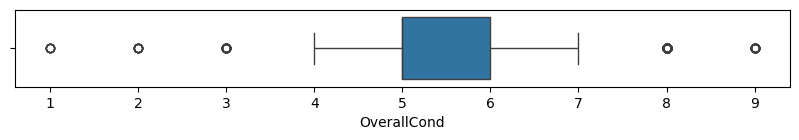

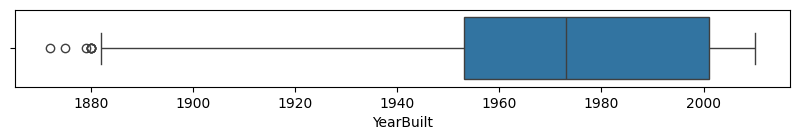

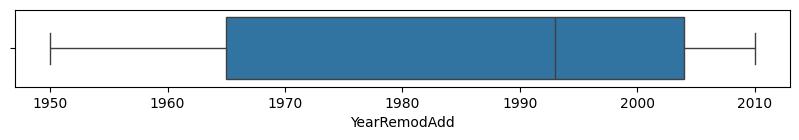

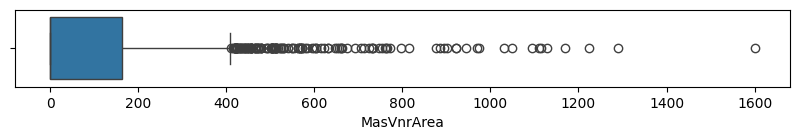

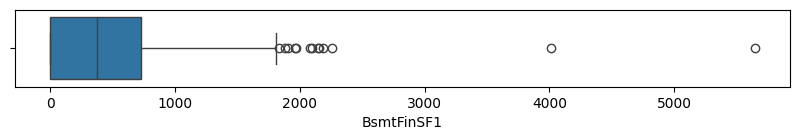

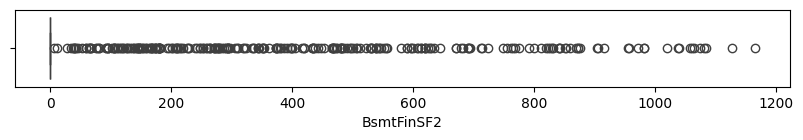

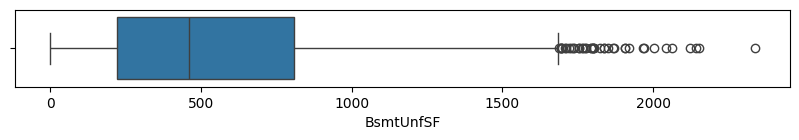

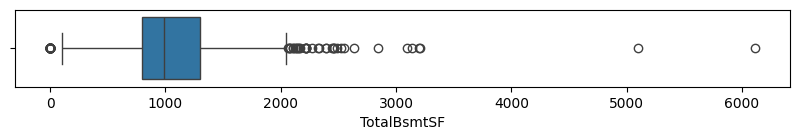

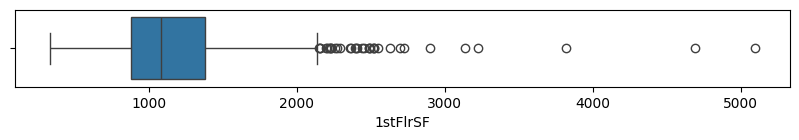

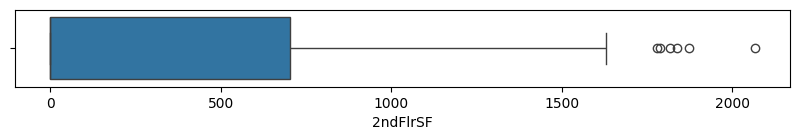

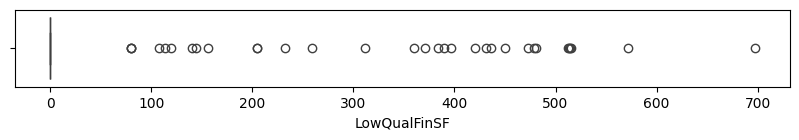

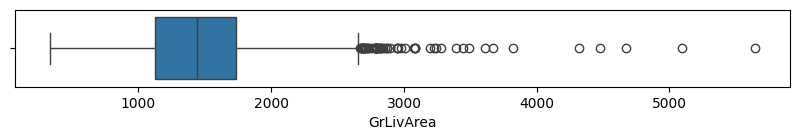

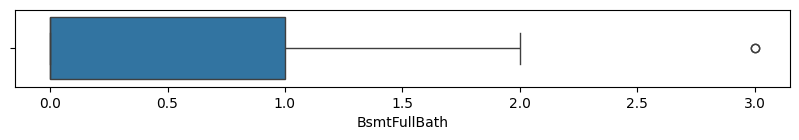

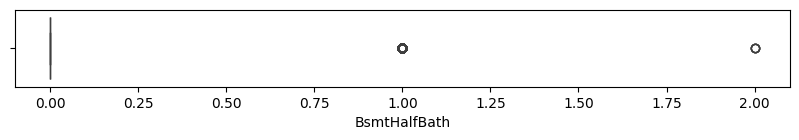

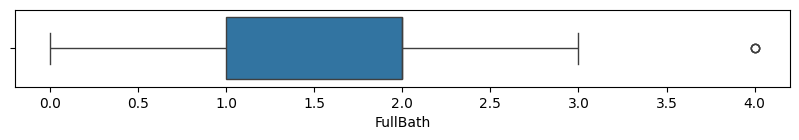

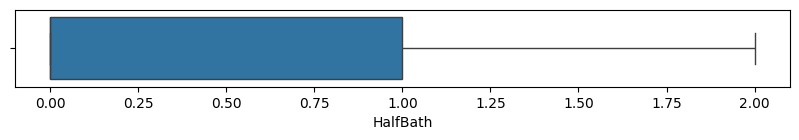

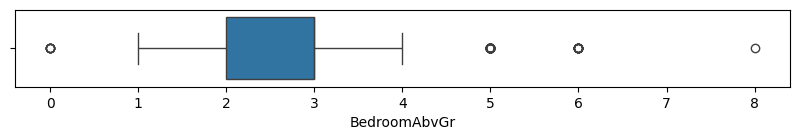

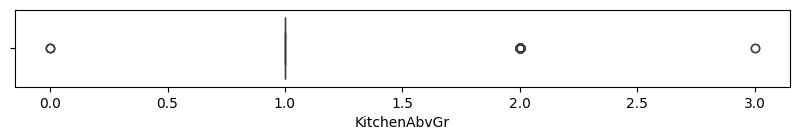

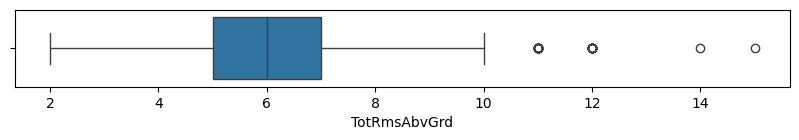

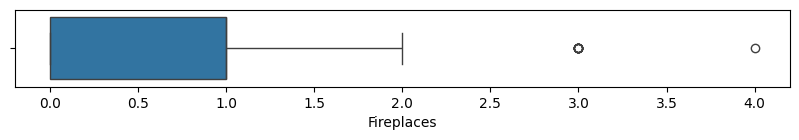

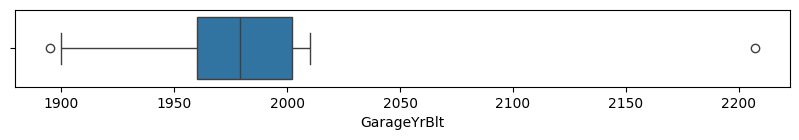

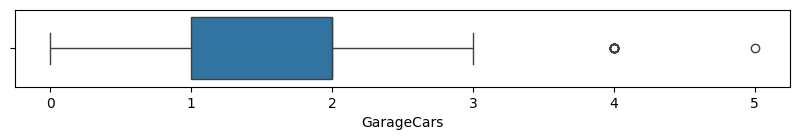

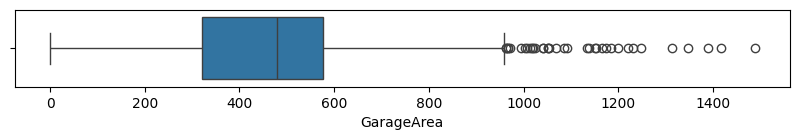

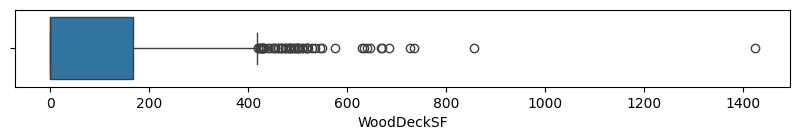

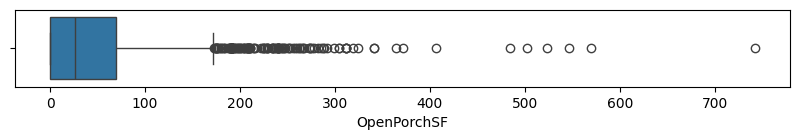

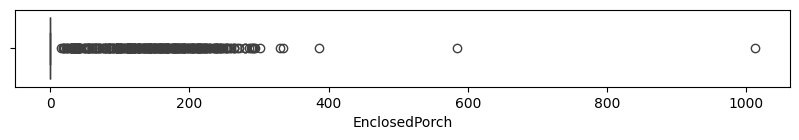

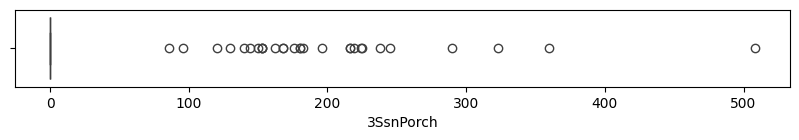

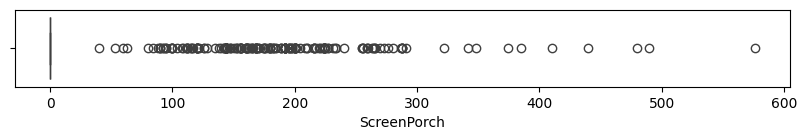

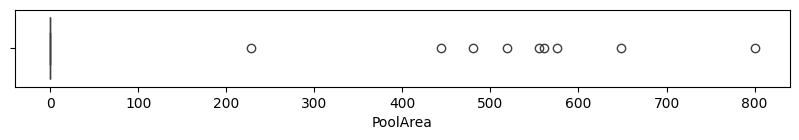

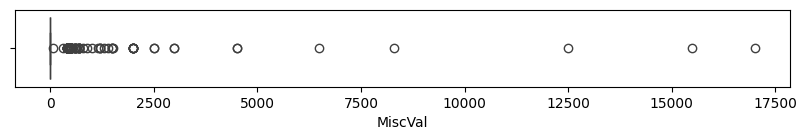

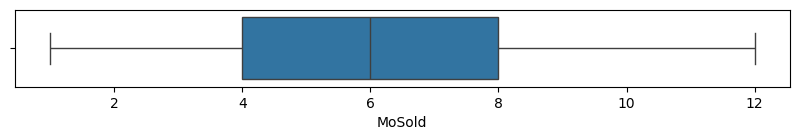

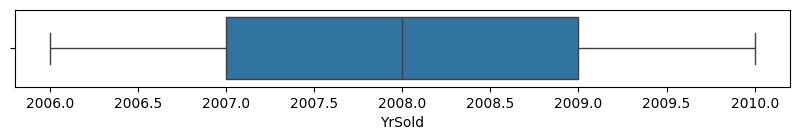

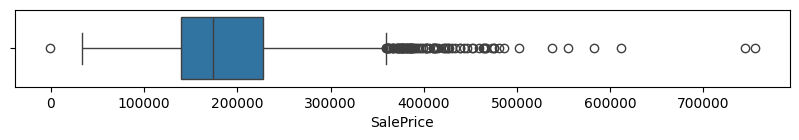

In [ ]:
# 3. Realizar la correlacion de los dos datasets
# Between data and data_sin_y

# data dataset
# number are including all the columns with numeric data
data_cols = data_without_object.columns

# Here just I taked the data_without_object and not data_without_object because
# both are the same dataset but data_without_object is the dataset without principal variable

for column in data_cols:
  plt.figure(figsize=(10, 1))
  sns.boxplot(data=data[data_cols], x=column)

In [40]:
outliers = {}

for col in data_cols:
# for col in data_sin_y_cols:
  Q1 = np.percentile(data_without_object[col], 25)
  Q3 = np.percentile(data_without_object[col], 75)
  # Take Q2 && Q3
  IRQ = Q3 - Q1
  # Calculate the limits
  lower_limit = Q1 - 1.5 * IRQ
  upper_limit = Q3 + 1.5 * IRQ
  # Find outliers
  outliers[col] = data_without_object[col][(data_without_object[col] < lower_limit) | (data_without_object[col] > upper_limit)]
  print(f'{col}: {len(outliers[col])
  }')



Id: 0
MSSubClass: 161
LotFrontage: 0
LotArea: 104
OverallQual: 3
OverallCond: 194
YearBuilt: 8
YearRemodAdd: 0
MasVnrArea: 0
BsmtFinSF1: 13
BsmtFinSF2: 269
BsmtUnfSF: 41
TotalBsmtSF: 94
1stFlrSF: 35
2ndFlrSF: 6
LowQualFinSF: 32
GrLivArea: 59
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 3
HalfBath: 0
BedroomAbvGr: 62
KitchenAbvGr: 107
TotRmsAbvGrd: 43
Fireplaces: 10
GarageYrBlt: 0
GarageCars: 0
GarageArea: 0
WoodDeckSF: 57
OpenPorchSF: 128
EnclosedPorch: 357
3SsnPorch: 29
ScreenPorch: 202
PoolArea: 9
MiscVal: 85
MoSold: 0
YrSold: 0
SalePrice: 91


In [44]:
# Desviación standar
outliers2 = {}

for col in data_cols:
  mean = data_without_object[col].mean()
  std = data_without_object[col].std()
  # Calculate the limits
  lower_limit = mean - 3 * std
  upper_limit = mean + 3 * std
  # Find outliers
  outliers2[col] = data_without_object[col][(data_without_object[col] < lower_limit) | (data_without_object[col] > upper_limit)]
  print(f'{col}: {len(outliers2[col])}')


Id: 0
MSSubClass: 44
LotFrontage: 17
LotArea: 22
OverallQual: 3
OverallCond: 45
YearBuilt: 8
YearRemodAdd: 0
MasVnrArea: 44
BsmtFinSF1: 15
BsmtFinSF2: 78
BsmtUnfSF: 12
TotalBsmtSF: 17
1stFlrSF: 23
2ndFlrSF: 7
LowQualFinSF: 26
GrLivArea: 19
BsmtFullBath: 2
BsmtHalfBath: 136
FullBath: 3
HalfBath: 21
BedroomAbvGr: 21
KitchenAbvGr: 107
TotRmsAbvGrd: 16
Fireplaces: 10
GarageYrBlt: 7
GarageCars: 1
GarageArea: 16
WoodDeckSF: 34
OpenPorchSF: 41
EnclosedPorch: 68
3SsnPorch: 29
ScreenPorch: 87
PoolArea: 9
MiscVal: 18
MoSold: 0
YrSold: 0
SalePrice: 28


In [45]:
# Count the number of missing values (NaN) in each column of the dataframe
data_without_object.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      387
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        20
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       1
BsmtHalfBath       1
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      126
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64